# Midterm Project 3 (100 points total)

## In this project, you need to use neural networks: Build a Feed-forward Neural Network and a Convolutional Neural Network using Keras library to classify patients with heart conditions.

### Import the necessary libraries. (5 points)

In [1]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### After that, upload the data and preprocess it. (20 points)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


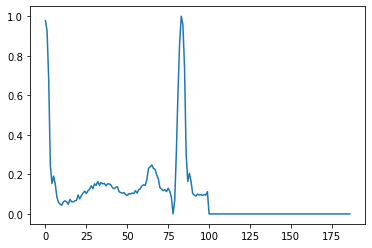

In [2]:
#Upload the data and save it to a Dataframe.
data = pd.read_csv('Heartbeat_dataset.csv', header=None)
data = pd.DataFrame(data)
data1 = data.iloc[:, :-1]
 
#Plot the heartbeat of one patient.
row1 = data1.iloc[0]
row1.plot()

# Check the class distribution. (Hint: Use .value_counts attribute and 
# remember that the labels are at the last column of the dataframe)
data_cd = data.iloc[:, -1]
print(data_cd.value_counts())

# You should see that class 0 has more than 5 times as many instances as all other classes combined.
# Make the dataset more balanced by sampling the instances with class 0.
# Filter all the data that don't have class 0 to a new dataframe.
data_zeros = data[data.iloc[:, -1] == 0]
data_zeros_col = data_zeros.iloc[:, -1]


data_non_zeros = data[data.iloc[:, -1] != 0]
data_non_zeros_col = data_non_zeros.iloc[:, -1]


# From all the data that has class 0 (again use filtering), sample 8000 instances and save it to a new dataframe. 
#(Hint: Use .sample attribute)
data_zeros_new = data_zeros.sample(n=8000, random_state = 1)


# Concatenate the two new dataframes.
data_concat_list = [data_zeros_new, data_non_zeros]
data_new_concat = pd.concat(data_concat_list)


# Check the new class distribution.

# Finally, separate the features and the labels into X and y variables.
X = data_new_concat.iloc[:, :-1]
y = data_new_concat.iloc[:, -1]



### Split the data into training and test sets. Use a 90-10 split ratio.

In [3]:
#Create the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


#Convert the sets into NumPy arrays (Necessary for Keras models)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Create a feed-forward neural network with 5 layers. (One input, three hidden, one output) (20 points)

In [4]:
# Create the network using the Keras layers. (Use 512, 100 and 20 nodes for the hidden layers.)
nn = Sequential()
nn.add(InputLayer(input_shape=(187,)))
nn.add(Dense(512, activation='relu', kernel_initializer='glorot_uniform'))
nn.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
nn.add(Dense(20, activation='relu', kernel_initializer='glorot_uniform'))
nn.add(Dense(5, activation='softmax', kernel_initializer='glorot_uniform'))

# early_stop = EarlyStopping(monitor='val_loss', patience=5)


# Compile and train the network. (Do not forget to expand the training labels into multiple columns.)
y_train_target = to_categorical(y_train)
y_test_target = to_categorical(y_test)

nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = nn.fit(X_train, y_train_target, validation_split=0.1, epochs=250)

Epoch 1/250
585/585 [==============================] - 2s 3ms/step - loss: 0.5297 - accuracy: 0.8136 - val_loss: 0.4264 - val_accuracy: 0.8436
Epoch 2/250
585/585 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8863 - val_loss: 0.3297 - val_accuracy: 0.8807
Epoch 3/250
585/585 [==============================] - 1s 2ms/step - loss: 0.2712 - accuracy: 0.9085 - val_loss: 0.2711 - val_accuracy: 0.9033
Epoch 4/250
585/585 [==============================] - 1s 2ms/step - loss: 0.2368 - accuracy: 0.9190 - val_loss: 0.2463 - val_accuracy: 0.9225
Epoch 5/250
585/585 [==============================] - 1s 2ms/step - loss: 0.2170 - accuracy: 0.9230 - val_loss: 0.2711 - val_accuracy: 0.9167
Epoch 6/250
585/585 [==============================] - 1s 2ms/step - loss: 0.2003 - accuracy: 0.9322 - val_loss: 0.2305 - val_accuracy: 0.9201
Epoch 7/250
585/585 [==============================] - 1s 2ms/step - loss: 0.1830 - accuracy: 0.9351 - val_loss: 0.2223 - val_accuracy: 0.9235

585/585 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.3691 - val_accuracy: 0.9447
Epoch 114/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.3228 - val_accuracy: 0.9562
Epoch 115/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.3766 - val_accuracy: 0.9528
Epoch 116/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0131 - accuracy: 0.9947 - val_loss: 0.4156 - val_accuracy: 0.9514
Epoch 117/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.3832 - val_accuracy: 0.9500
Epoch 118/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.3718 - val_accuracy: 0.9442
Epoch 119/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0133 - accuracy: 0.9950 - val_loss: 0.3459 - val_accuracy: 0.9471

585/585 [==============================] - 1s 2ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.4180 - val_accuracy: 0.9519
Epoch 226/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9970 - val_loss: 0.4225 - val_accuracy: 0.9495
Epoch 227/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.4165 - val_accuracy: 0.9533
Epoch 228/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.4039 - val_accuracy: 0.9552
Epoch 229/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.4253 - val_accuracy: 0.9524
Epoch 230/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.4263 - val_accuracy: 0.9466
Epoch 231/250
585/585 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9974 - val_loss: 0.4242 - val_accuracy: 0.9533

### Evaluate your neural network with the test data. You need to achieve 90+% test accuracy for full credit. (5 points)

In [5]:
# Get the predictions and convert the multicolumn array into class predictions.
print(nn.evaluate(X_test, y_test_target))
y_pred = np.argmax(nn.predict(X_test), axis=1)


# Plot the confusion matrix and print the final accuracy.
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))




73/73 [==============================] - 0s 1ms/step - loss: 0.4182 - accuracy: 0.9498
[0.41821160912513733, 0.9497618079185486]
0.9497618016457341
[[774  27   4   5   4]
 [ 16 192   4   2   1]
 [ 18   3 539   9   2]
 [  3   0   6  57   0]
 [  5   2   4   1 631]]


### After the feed-forward neural network, train a convolutional neural network (CNN) on the same data. (20 points)

In [6]:
#Add a dimension to each sequence
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

# Create the CNN using the Keras layers. (Hint: You can keep the fully-connected part the same as the previous network.)
cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(187,1)))
cnn.add(MaxPooling1D(pool_size=5))

cnn.add(Conv1D(32, 3, activation='relu'))
cnn.add(MaxPooling1D(pool_size=5))
        
cnn.add(Conv1D(64, 3, activation='relu'))
cnn.add(MaxPooling1D(pool_size=5))
        
cnn.add(Flatten())
        
cnn.add(Dense(activation='relu', units=512))
cnn.add(Dense(activation='relu', units=100))
cnn.add(Dense(activation='relu', units=20))
cnn.add(Dense(activation='softmax', units=5))


# Compile and train the network.


cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
# early = EarlyStopping(monitor='val_loss', patience=5)

cnn.fit(X_train, y_train_target, validation_split=0.1, epochs=250)


Epoch 1/250
585/585 [==============================] - 4s 7ms/step - loss: 0.7418 - accuracy: 0.7198 - val_loss: 0.4253 - val_accuracy: 0.8619
Epoch 2/250
585/585 [==============================] - 4s 7ms/step - loss: 0.3620 - accuracy: 0.8810 - val_loss: 0.4331 - val_accuracy: 0.8450
Epoch 3/250
585/585 [==============================] - 4s 7ms/step - loss: 0.2978 - accuracy: 0.9038 - val_loss: 0.3187 - val_accuracy: 0.9004
Epoch 4/250
585/585 [==============================] - 4s 7ms/step - loss: 0.2546 - accuracy: 0.9163 - val_loss: 0.3454 - val_accuracy: 0.8826
Epoch 5/250
585/585 [==============================] - 4s 7ms/step - loss: 0.2328 - accuracy: 0.9232 - val_loss: 0.2420 - val_accuracy: 0.9216
Epoch 6/250
585/585 [==============================] - 4s 7ms/step - loss: 0.2144 - accuracy: 0.9279 - val_loss: 0.2217 - val_accuracy: 0.9312
Epoch 7/250
585/585 [==============================] - 4s 7ms/step - loss: 0.2058 - accuracy: 0.9320 - val_loss: 0.2769 - val_accuracy: 0.9105

Epoch 114/250
585/585 [==============================] - 4s 7ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.2348 - val_accuracy: 0.9572
Epoch 115/250
585/585 [==============================] - 4s 7ms/step - loss: 0.0226 - accuracy: 0.9922 - val_loss: 0.2552 - val_accuracy: 0.9567
Epoch 116/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0137 - accuracy: 0.9947 - val_loss: 0.3014 - val_accuracy: 0.9524
Epoch 117/250
585/585 [==============================] - 4s 7ms/step - loss: 0.0142 - accuracy: 0.9952 - val_loss: 0.2336 - val_accuracy: 0.9538
Epoch 118/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0128 - accuracy: 0.9952 - val_loss: 0.2674 - val_accuracy: 0.9543
Epoch 119/250
585/585 [==============================] - 4s 7ms/step - loss: 0.0196 - accuracy: 0.9929 - val_loss: 0.2395 - val_accuracy: 0.9524
Epoch 120/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0135 - accuracy: 0.9947 - val_loss: 0.2690 - val_ac

585/585 [==============================] - 4s 6ms/step - loss: 0.0062 - accuracy: 0.9979 - val_loss: 0.3055 - val_accuracy: 0.9615
Epoch 227/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.3799 - val_accuracy: 0.9495
Epoch 228/250
585/585 [==============================] - 4s 7ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.2691 - val_accuracy: 0.9572
Epoch 229/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.3069 - val_accuracy: 0.9620
Epoch 230/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0172 - accuracy: 0.9949 - val_loss: 0.2276 - val_accuracy: 0.9634
Epoch 231/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.3078 - val_accuracy: 0.9524
Epoch 232/250
585/585 [==============================] - 4s 6ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.2638 - val_accuracy: 0.9577

### Evaluate your CNN with the test data. You need to beat the feed-forward network accuracy for full credit. (5 points)

In [7]:
# Get the predictions and convert the multicolumn array into class predictions.
print(cnn.evaluate(X_test, y_test_target))
y_pred2 = np.argmax(cnn.predict(X_test), axis=1)


# Plot the confusion matrix and print the final accuracy.
print(accuracy_score(y_pred2, y_test))
print(confusion_matrix(y_pred2, y_test))



73/73 [==============================] - 0s 3ms/step - loss: 0.3125 - accuracy: 0.9606
[0.3124532997608185, 0.9605889916419983]
0.9605889995669121
[[776  19   3   6   2]
 [ 22 202   2   0   0]
 [ 10   3 544   7   0]
 [  4   0   6  60   0]
 [  4   0   2   1 636]]


### Answer the following questions: (20 points, 5 each)

### 1) If we haven't undersampled class 0, we would get a even higher accuracy. (You can check yourself.) Why would this be misleading?

### 2) In the previous projects, you used 70-30 and 80-20 train-test splits. Why is a 90-10 split enough for this project?

### 3) Why did we need to add a dimension to the dataset before we fed it into a CNN?

### 4) Why does a CNN perform better than a feed-forward neural network for the data in this project?

In [3]:
print('1) If we don’t do undersampling for the class 0 dataset, the Neural Network models will be more biased towards the class 0 dataset and that could lead to overfitting and not give accurate results for the dataset with other classes which have less number of samples.')
print('2) This project involves neural networks which require a lot of data and it will take a lot of time to train the model. Since the point of test set is to test the performance of a given set of parameters at each time we run the model, testing the model on a small dataset is sufficient')
print('3)There is a dot product operation between kernel and the input data in convolution operation. For this convolution operation to take place, the input data needs to be represented in 2D dimensional form so that the kernel can slide over the input data and perform the dot product.')
print('4) In this project the neural network model has to predict different classes based on the time series data. This means that the neural network needs to learn the features and learn the temporal data and the CNN model can use the kernels and the convolution operation to do this.')

1) If we don’t do undersampling for the class 0 dataset, the Neural Network models will be more biased towards the class 0 dataset and that could lead to overfitting and not give accurate results for the dataset with other classes which have less number of samples.
2) This project involves neural networks which require a lot of data and it will take a lot of time to train the model. Since the point of test set is to test the performance of a given set of parameters at each time we run the model, testing the model on a small dataset is sufficient
3)There is a dot product operation between kernel and the input data in convolution operation. For this convolution operation to take place, the input data needs to be represented in 2D dimensional form so that the kernel can slide over the input data and perform the dot product.
4) In this project the neural network model has to predict different classes based on the time series data. This means that the neural network needs to learn the featu